In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import math
from keras.layers import Dense, LSTM
from google_drive_downloader import GoogleDriveDownloader as gdd

Drive link : https://drive.google.com/file/d/1W7DVHYgEs_uFIIqmnsPHnqWOspBVXtuW/view?usp=sharing

In [3]:
gdd.download_file_from_google_drive(file_id='1W7DVHYgEs_uFIIqmnsPHnqWOspBVXtuW',
                                    dest_path='content/DailyDelhiClimate.zip',
                                    unzip=True)

Unzipping...Done.


In [4]:
data_train = pd.read_csv("/content/content/DailyDelhiClimate/DailyDelhiClimateTrain.csv")
data_train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [5]:
data_test = pd.read_csv("/content/content/DailyDelhiClimate/DailyDelhiClimateTest.csv")
data_test.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [7]:
data_train['date'] = pd.to_datetime(data_train['date'])
data_test['date'] = pd.to_datetime(data_test['date'])

In [8]:
print(len(data_train))
print(len(data_test))

1462
114


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   datetime64[ns]
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 57.2 KB


In [ ]:
data_train.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


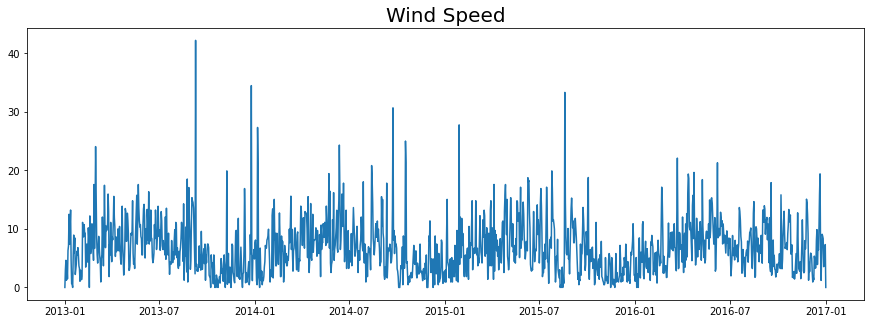

In [80]:
wind_speed_train = data_train['wind_speed'].values
wind_speed_test = data_test['wind_speed'].values
dates = data_train['date'].values


plt.figure(figsize=(15,5))
plt.plot(dates, wind_speed_train)
plt.title('Wind Speed', fontsize=20);

In [111]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [112]:
train_set = wind_speed_train.reshape(len(wind_speed_train),1)
test_set = wind_speed_test.reshape(len(wind_speed_test),1)

In [113]:
trainX, trainY = create_dataset(train_set, 1)
testX, testY = create_dataset(test_set, 1)

In [114]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1],1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1],1))

In [136]:
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(100, return_sequences=True, input_shape = (trainX.shape[1], 1)),
  tf.keras.layers.LSTM(100),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

In [137]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.huber,
              optimizer=optimizer,
              metrics=["mae"])

In [138]:
history = model.fit(trainX, trainY, epochs = 100, batch_size = 16)

Epoch 1/100
92/92 [==============================] - 3s 4ms/step - loss: 6.2623 - mae: 6.7522
Epoch 2/100
92/92 [==============================] - 0s 4ms/step - loss: 6.0979 - mae: 6.5870
Epoch 3/100
92/92 [==============================] - 0s 4ms/step - loss: 5.9175 - mae: 6.4043
Epoch 4/100
92/92 [==============================] - 0s 4ms/step - loss: 5.7272 - mae: 6.2108
Epoch 5/100
92/92 [==============================] - 0s 4ms/step - loss: 5.5204 - mae: 5.9998
Epoch 6/100
92/92 [==============================] - 0s 4ms/step - loss: 5.2881 - mae: 5.7643
Epoch 7/100
92/92 [==============================] - 0s 4ms/step - loss: 5.0226 - mae: 5.4985
Epoch 8/100
92/92 [==============================] - 0s 4ms/step - loss: 4.7162 - mae: 5.1905
Epoch 9/100
92/92 [==============================] - 0s 4ms/step - loss: 4.3660 - mae: 4.8405
Epoch 10/100
92/92 [==============================] - 0s 4ms/step - loss: 3.9726 - mae: 4.4425
Epoch 11/100
92/92 [==============================] - 0s 4m

In [139]:
max = data_train.iloc[data_train['wind_speed'].idxmax(), 3:4]
min = data_train.iloc[data_train['wind_speed'].idxmin(), 3:4]
skala_data = (max - min) * 0.1
print("skala data -> ", skala_data)

skala data ->  wind_speed    4.222
dtype: object


In [140]:
prediction = model.predict(testX)
prediction[:5]

array([[3.7646942],
       [3.8684962],
       [4.6709895],
       [5.0607557],
       [4.1526995]], dtype=float32)

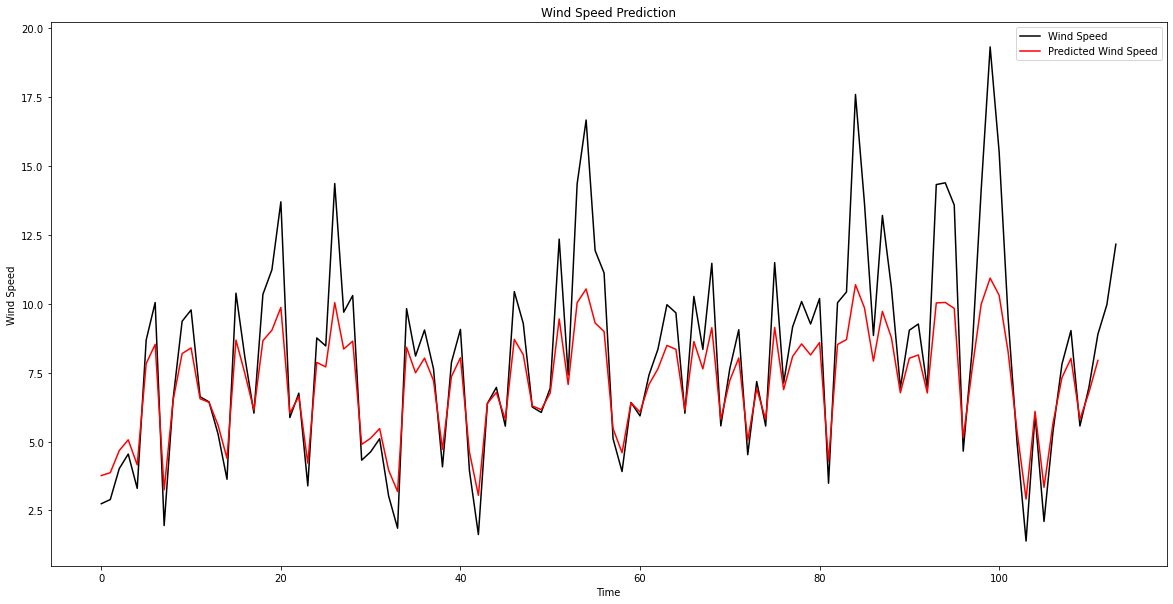

In [141]:
plt.figure(figsize=(20,10))
plt.plot(test_set, color = 'black', label = 'Wind Speed')
plt.plot(prediction, color = 'red', label = 'Predicted Wind Speed')
plt.title('Wind Speed Prediction')
plt.xlabel('Time')
plt.ylabel('Wind Speed')
plt.legend()
plt.show()